 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/09/09.ipynb#Základní-knihovna-pro-vytváření-grafů" data-toc-modified-id="Základní-knihovna-pro-vytváření-grafů-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Základní knihovna pro vytváření grafů</a></span></li><li><span><a href="http://localhost:8888/notebooks/09/09.ipynb#ggplot2" data-toc-modified-id="ggplot2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>ggplot2</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/09/09.ipynb#rgl" data-toc-modified-id="rgl-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>rgl</code></a></span></li></ul></div>

# Základní vizualizace dat v R

TODO

## Základní knihovna pro vytváření grafů

TODO

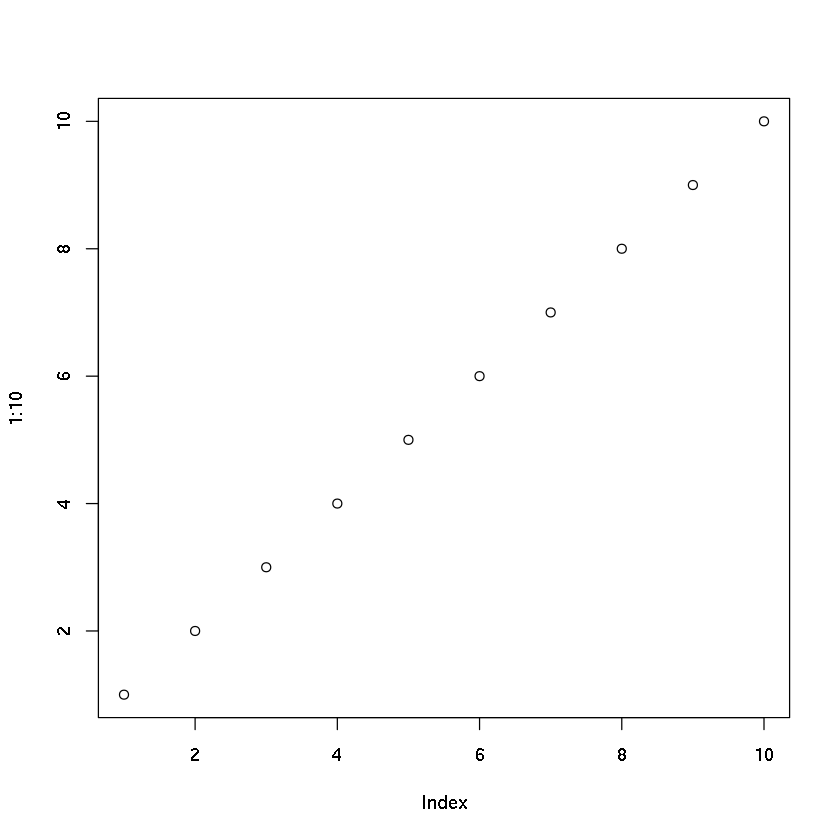

In [1]:
plot(1:10)

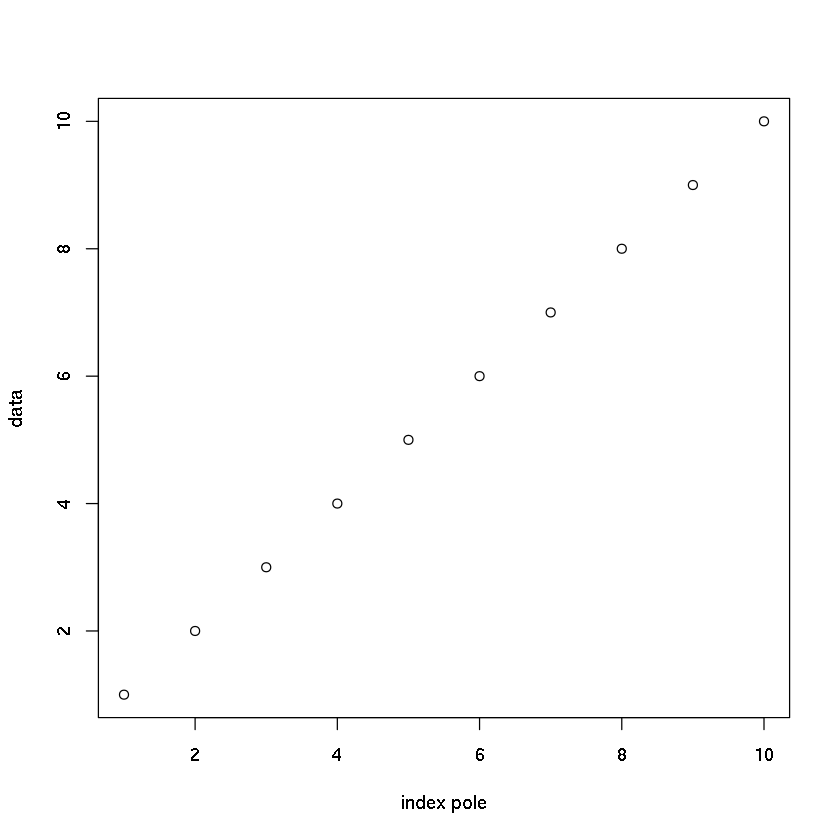

In [2]:
plot(1:10, xlab = "index pole", ylab = "data")

In [3]:
?par

In [4]:
current_par <- par()
length(current_par)
head(current_par)

[1] 72

$xlog
[1] FALSE

$ylog
[1] FALSE

$adj
[1] 0.5

$ann
[1] TRUE

$ask
[1] FALSE

$bg
[1] "white"

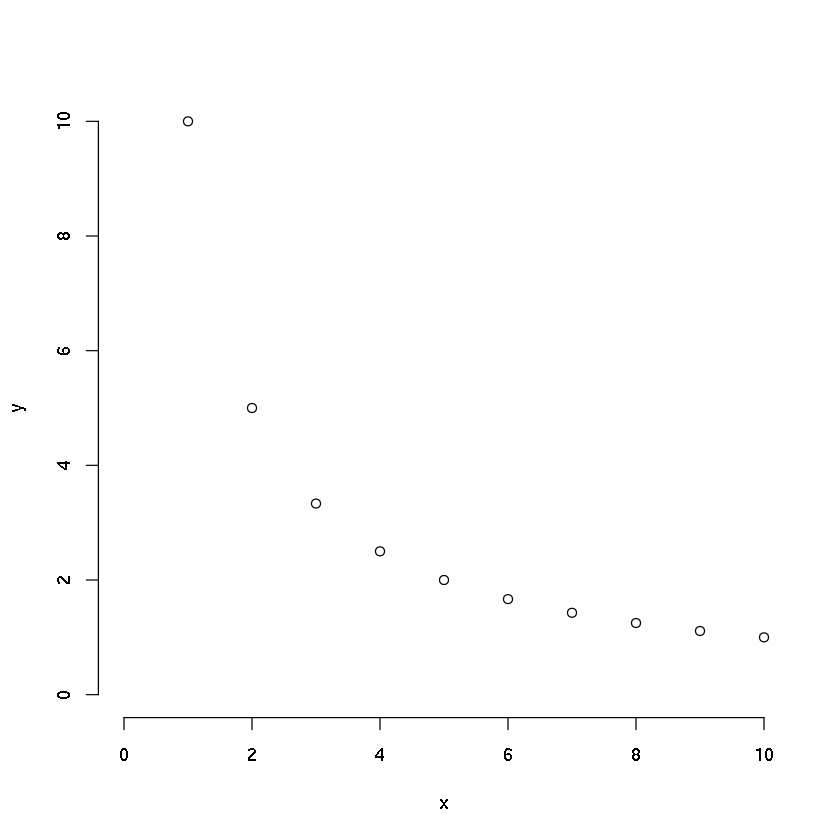

In [5]:
test_plot <- function() {
    plot(
        1:10
        , 10 / (1:10)
        , xlab = "x"
        , ylab = "y"
        , xlim = c(0, 10)
        , ylim = c(0, 10)
    )
}

par(bty = "n")
test_plot()

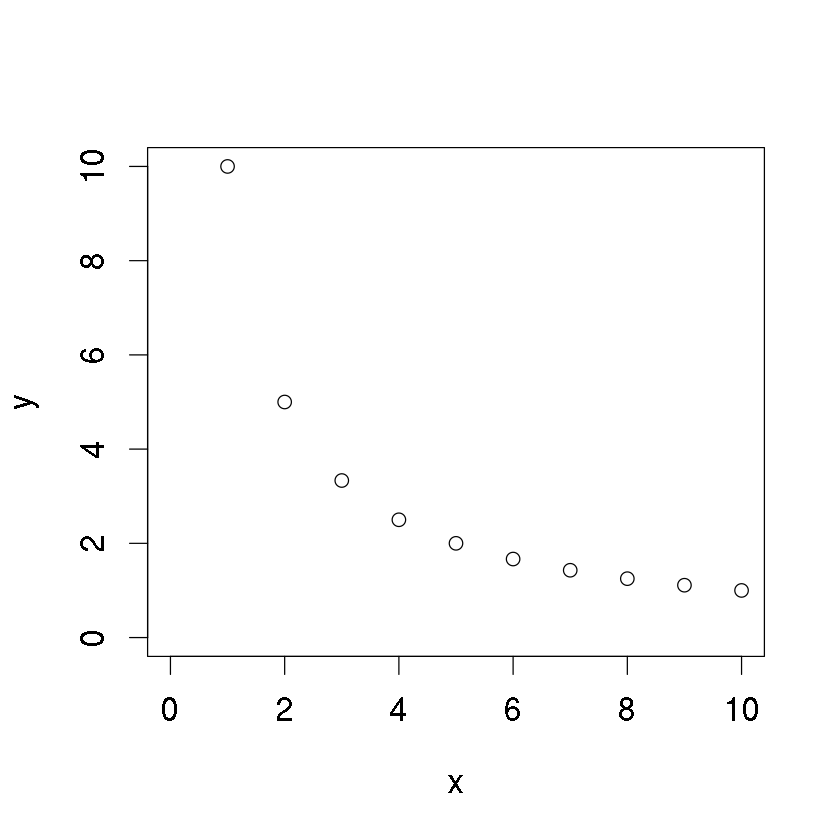

In [6]:
par(cex = 1.5)
test_plot()

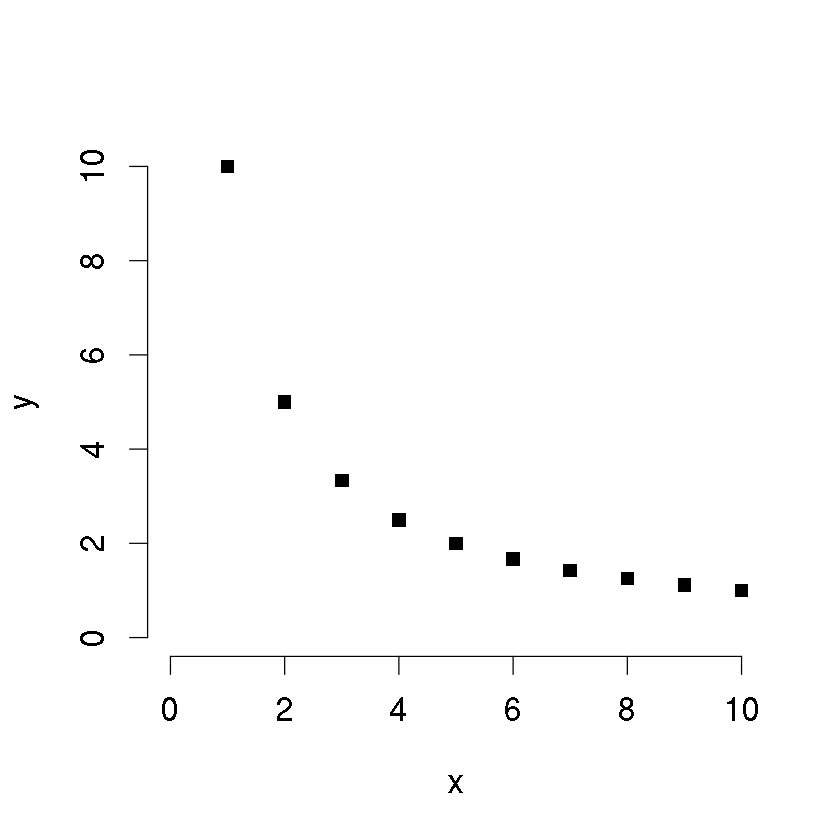

In [7]:
my_params <- list(
    bty = "n"
    , cex = 1.5
    , pch = 15
)
par(my_params)
test_plot()

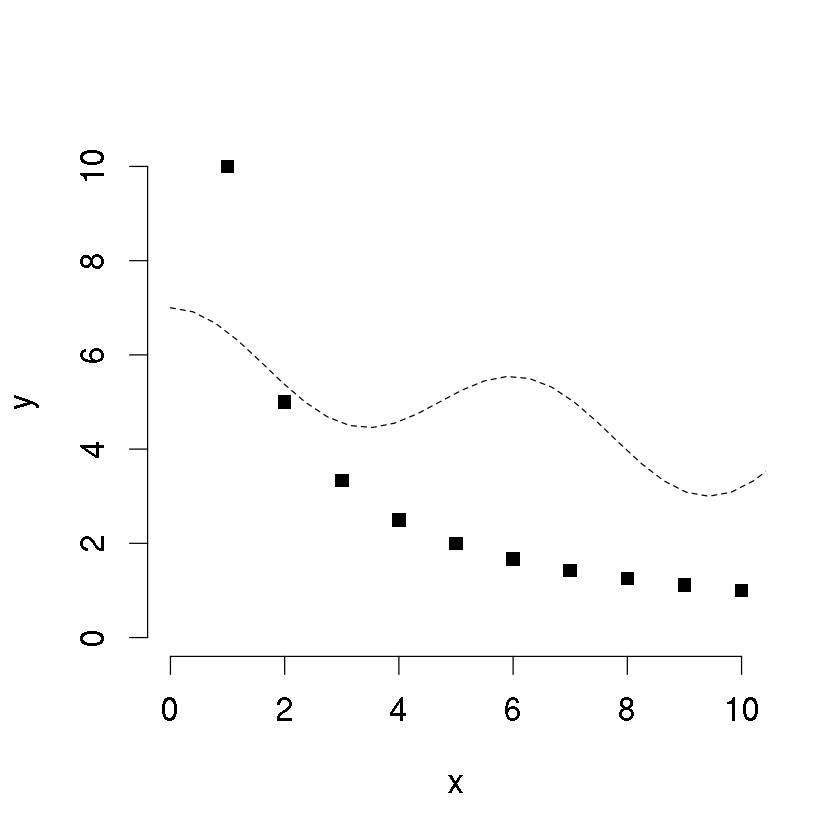

In [8]:
my_params <- c(my_params, list(lty = 2))
par(my_params)
test_plot()
x <- seq(0, 6*pi, pi / 8)
y <- cos(x) + cos(x / 3) + 5
lines(x, y)

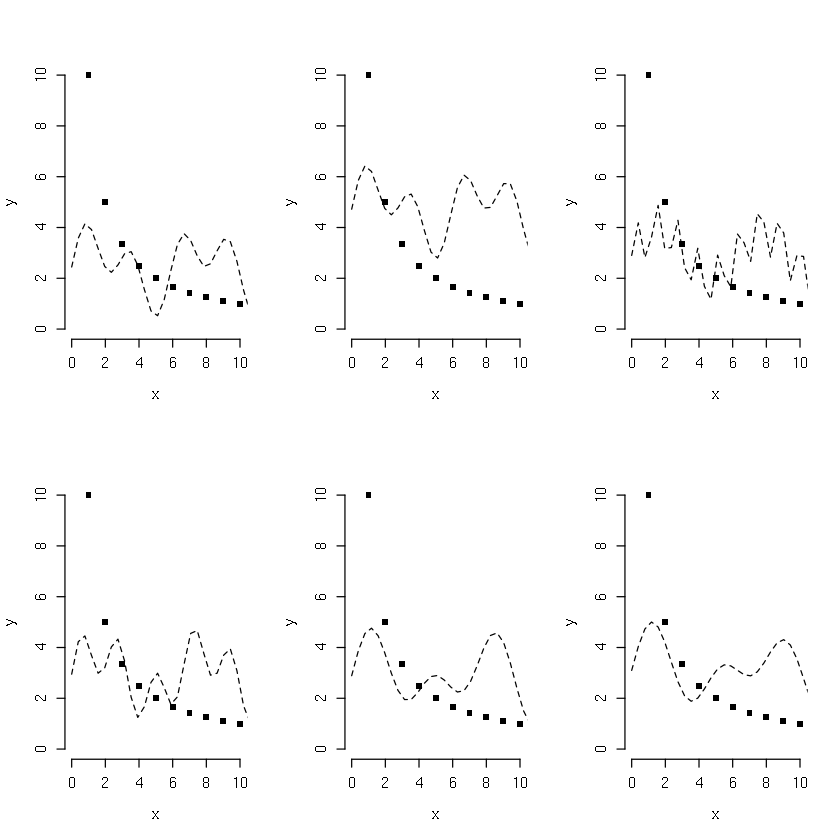

In [9]:
multi_params <- c(my_params, list(mfrow = c(2, 3)))
par(multi_params)
for (i in 1:6) {
    test_plot()
    rnd_1 <- runif(1, 0, 1)
    rnd_2 <- runif(1, 2, 6)
    x <- seq(0, 6*pi, pi / 8)
    y <- sin(x) + sin(x / rnd_1) + rnd_2
    lines(x, y)
}

In [10]:
?options

In [11]:
current_options <- options()
length(current_options)
head(current_options)

[1] 81

$add.smooth
[1] TRUE

$bitmapType
[1] "cairo"

$browser
[1] ""

$browserNLdisabled
[1] FALSE

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

In [12]:
current_options$repr.plot.height
current_options$repr.plot.width

[1] 7

[1] 7

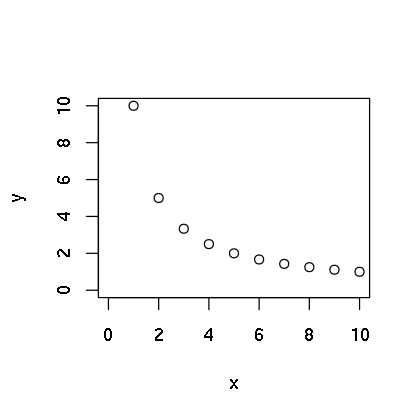

In [13]:
options(repr.plot.width=3.5, repr.plot.height=3.5)
test_plot()

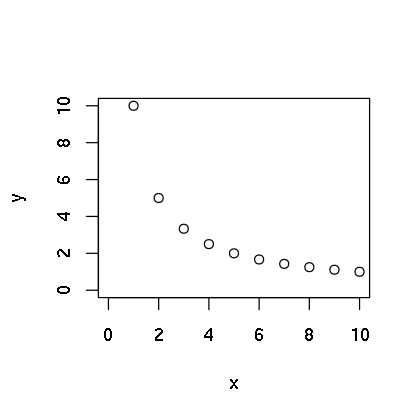

In [14]:
test_plot()

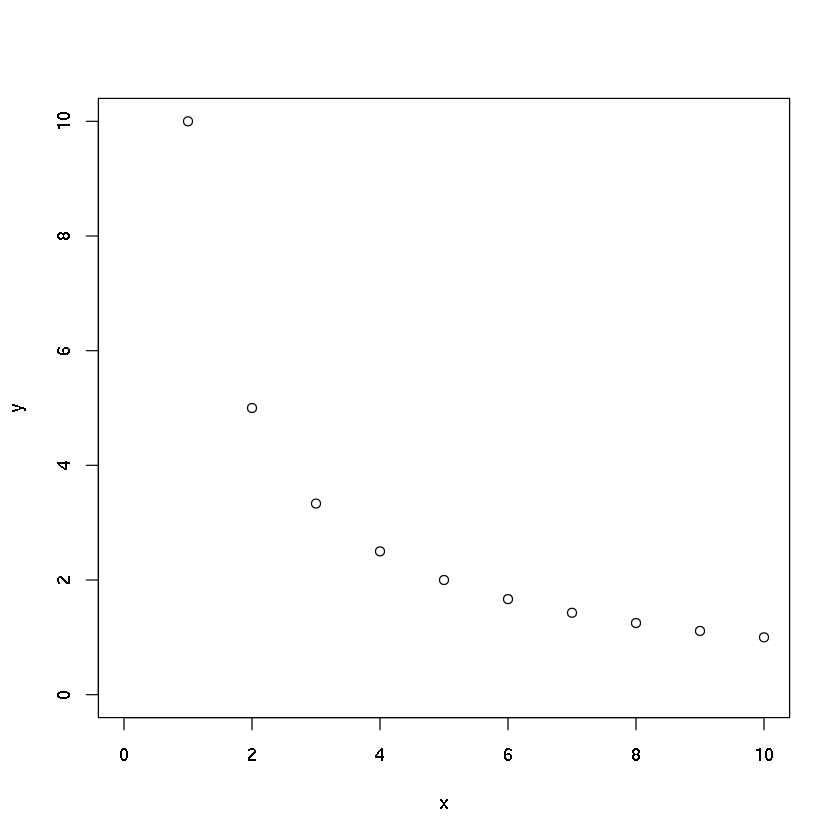

In [15]:
options(current_options)
test_plot()

In [16]:
png(filename="test.png")
test_plot()
dev.off()

png 
  2

## `ggplot2`

TODO

## `rgl`

TODO


```bash
sudo apt-get install freeglut3 freeglut3-dev
```

https://cran.r-project.org/mirrors.html

In [17]:
install.packages("rgl", repos = "https://mirrors.nic.cz/R/")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
library("rgl")

In [19]:
x <- rnorm(100)
y <- rnorm(100)
z <- rnorm(100)

In [20]:
open3d()
plot3d(x, y, z, type='s', col = "red", size = 1) # display a 3D scatter plot

glX 
  1

In [21]:
browse_creation <- function(filename = "creation.html") {
    writeWebGL(
        filename = filename
        , width = 800
    )
    browseURL(filename, browser = "google-chrome-stable")
}

browse_creation("plot3d.html")

In [22]:
rgl.close()

In [23]:
z <- volcano # zaznamenané výšky v metrech

# mřížka o velkosti jednoho pole 10x10 metrů
x <- 10 * (1:nrow(z))
y <- 10 * (1:ncol(z))

# rozsah barev pro konturu povrchu výškové mapy
zlim <- range(z)
zlen <- zlim[2] - zlim[1] + 1
colorlut <- heat.colors(zlen) # vytvoření barevného rozsahu pro různé výšky
col <- colorlut[ z-zlim[1]+1 ] # výběr barev podle hodnot v matici výšek

# zobrazení mapy jako plochy ve 3D
open3d()
rgl.surface(x, y, matrix(min(z), nrow(z), ncol(z)), color = col, back = "fill")

glX 
  3

In [24]:
browse_creation("volcano_map.html")

In [25]:
colorlut <- terrain.colors(zlen) # vytvoření barevného rozsahu pro různé výšky terénu
col <- colorlut[ z-zlim[1]+1 ] # výběr barev terénu podle hodnot v matici výšek

# umístění nové plochy do aktuálního prostoru
rgl.surface(x, y, z, color=col, back="fill")

In [26]:
browse_creation("volcano_3D.html")

In [27]:
rgl.close()